### Background:

Breast cancer is the most common cancer among women in the world. It account for 25% of all cancer cases, and affected over 2.1 Million people in 2015. It starts when cells in the breast begin to grow out of control. These cells usually form a tumor that can often be seen on an X-ray or felt as a lump.

Early diagnosis significantly increases the chances of surviver. The key challenges against it's detection is how to classify tumors into malignant(Cancer) or benign(not cancer). A tumor is considered malignant (Cancer) if the cells can grow into surrounding tissues or spread to distant areas of the body. A benign tumor does not invade nearby tissue or spread to other parts of the body the way cancer can. But benign tumors can be serious if they press on vital structures such as blood vessel or nerves.

Machine Learning technique can dramatically improve the level of diagnosis in breast cancer. Research shows that experience physicians can detect cancer by 79% accuracy, while 91%(up to 97%) accuracy can be achieved using Machine Learning techniques.

#### Project Task

In this study, my task is to classify tumors into malignant (cancer) or benign using features obtained from several cell images.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

#### Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)

#### Ten real-valued features are computed for each cell nucleus:

- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension ("coastline approximation" - 1)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

As we can see above, not much can be done in the current form of the dataset. We need to view the data in a better format.

In [4]:
import numpy as np

In [5]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [6]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0.0


- mean radius = mean of distances from center to points on the perimeter
- mean texture = standard deviation of gray-scale values
- mean perimeter = mean size of the core tumor
- mean area = 
- mean smoothness = mean of local variation in radius lengths
- mean compactness = mean of perimeter^2 / area - 1.0
- mean concavity = mean of severity of concave portions of the contour
- mean concave points = mean for number of concave portions of the contour
- mean symmetry =
- mean fractal dimension = mean for "coastline approximation" - 1
- radius error = standard error for the mean of distances from center to points on the perimeter
- texture error = standard error for standard deviation of gray-scale values
- perimeter error =
- area error =
- smoothness error = standard error for local variation in radius lengths
- compactness error = standard error for perimeter^2 / area - 1.0
- concavity error = standard error for severity of concave portions of the contour
- concave points error = standard error for number of concave portions of the contour
- symmetry error =
- fractal dimension error = standard error for "coastline approximation" - 1
- worst radius = "worst" or largest mean value for mean of distances from center to points on the perimeter
- worst texture = "worst" or largest mean value for standard deviation of gray-scale values
- worst perimeter =
- worst smoothness = "worst" or largest mean value for local variation in radius lengths
- worst compactness = "worst" or largest mean value for perimeter^2 / area - 1.0
- worst concavity = "worst" or largest mean value for severity of concave portions of the contour
- worst concave points = "worst" or largest mean value for number of concave portions of the contour
- worst fractal dimension = "worst" or largest mean value for "coastline approximation" - 1

# Introduction to Classification Modeling: Suport Vector Maching (SVM)¶

# Modeling

Depending on how long we've lived in a particular place and traveled to a location, we probably have a good understanding of commute times in our area. For example, we've traveled to work/school using some combination of the Metro, buses, trains, Ubers, taxis, carpools, walking, biking, etc.

**All humans naturally model the world around them.**

Over time, our observations about transportation have built up a mental dataset and a mental model that helps us predict what traffic will be like at various times and locations. We probably use this mental model to help plan our days, predict arrival times, and many other tasks.

- As data scientists we attempt to make our understanding of relationships between different quantities more precise through using data and mathematical/statistical structures.
- This process is called modeling.
- Models are simplifications of reality that help us to better understand that which we observe.
- In a data science setting, models generally consist of an independent variable (or output) of interest and one or more dependent variables (or inputs) believed to have an effect on the independent variable.
- Linear regression is an extremely common and critically important modeling tool.

# Model-based inference

- We can use models to conduct inference.
- Given a model, we can better understand relationships between an independent variable and the dependent variable or between multiple independent variables.

**An examples of where inference from a mental model would be valuable is:**

Determining what times of the day we work best or get tired.

# Prediction

- We can use a model to make predictions, or to estimate an dependent variable's value given at least one independent variable's value.
- Predictions can be valuable even if they are not exactly right.
- Good predictions are extremely valuable for a wide variety of purposes.

**An examples of where prediction from a mental model could be valuable:**

Predicting how long it will take to get from point A to point B.

# What is the difference between model prediction and inference?

- Inference is judging what the reationship, if any, there is between the data and the output.
- Prediction is making guesses about future scenarios based on data and a model constructed on that data.

**In this project, we will be talking about a particular Machine Learning Model called Support Vector Machine (SVM)**

# Introduction to SVM

# What is a Support Vector Machine (SVM)?

A Support Vector Machine (SVM) is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection. 

SVM is well suited for classification of complex but small or medium sized datasets.

# How does SVM classify?

It's important to start with the intuition for SVM with the **special linearly separable** classification case.

If classification of observations is **"linearly separable"**, SVM fits the **"decision boundary"** that is defined by the largest margin between the closest points for each class. This is commonly called the **"maximum margin hyperplane (MMH)"**.

![linearly separable SVM](linear_separability_vs_not.png)

# The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different [Kernel](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

# The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing [Kernel functions](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see [Scores and probabilities](http://scikit-learn.org/stable/modules/svm.html#scores-probabilities), below).

# Model Training

**From our dataset, let's create the target and predictor matrix**

- "y" = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.
- "X" = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc)

In [7]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.

In [8]:
X.shape

(569, 30)

In [9]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [10]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

### Create the training and testing data

Now that we've assigned values to our "X" and "y", the next step is to import the python library that will help us to split our dataset into training and testing data.

- Training data = Is the subset of our data used to train our model.
- Testing data =  Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.

In [11]:
from sklearn.model_selection import train_test_split

Let's split our data using 80% for training and the remaining 20% for testing.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

Let now check the size our training and testing data.

In [13]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)
The size of our testing "X" (input features) is (114, 30)
The size of our training "y" (output feature) is (455,)
The size of our testing "y" (output features) is (114,)


In [14]:
y_train

412    1.0
461    0.0
532    1.0
495    1.0
13     0.0
24     0.0
511    1.0
148    1.0
272    0.0
320    1.0
323    0.0
416    1.0
209    1.0
81     1.0
520    1.0
544    1.0
128    1.0
219    0.0
406    1.0
390    1.0
350    1.0
446    0.0
175    1.0
257    0.0
477    1.0
140    1.0
7      0.0
281    1.0
84     1.0
9      0.0
      ... 
79     1.0
555    1.0
43     0.0
401    1.0
509    0.0
259    0.0
274    0.0
288    1.0
478    1.0
441    0.0
203    0.0
537    1.0
282    0.0
6      0.0
255    0.0
485    1.0
144    1.0
190    0.0
567    0.0
469    1.0
552    1.0
118    0.0
162    0.0
404    1.0
393    0.0
218    0.0
223    0.0
271    1.0
474    1.0
355    1.0
Name: target, Length: 455, dtype: float64

In [15]:
y_test

269    1.0
263    0.0
30     0.0
452    1.0
214    0.0
181    0.0
32     0.0
248    1.0
318    1.0
352    0.0
317    0.0
52     1.0
356    1.0
45     0.0
496    1.0
440    1.0
467    1.0
261    0.0
94     0.0
505    1.0
427    1.0
166    1.0
29     0.0
16     0.0
129    0.0
77     0.0
3      0.0
453    1.0
238    1.0
394    1.0
      ... 
333    1.0
127    0.0
490    1.0
424    1.0
106    1.0
507    1.0
74     1.0
33     0.0
59     1.0
354    1.0
564    0.0
536    0.0
10     0.0
471    1.0
147    1.0
500    1.0
71     1.0
253    0.0
53     0.0
35     0.0
93     1.0
411    1.0
353    0.0
283    0.0
557    1.0
17     0.0
504    1.0
346    1.0
14     0.0
110    1.0
Name: target, Length: 114, dtype: float64

### Import Support Vector Machine (SVM) Model 

In [16]:
from sklearn.svm import SVC

In [17]:
svc_model = SVC()

### Now, let's train our SVM model with our "training" dataset.

In [18]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Let's use our trained model to make a prediction using our testing data

In [19]:
y_predict = svc_model.predict(X_test)

**Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). We are going to use confusion matrix for this comparison**

<a id='confusion-matrix'></a>

## The confusion matrix

---

The confusion matrix is a table representing the performance of your model to classify labels correctly.

**A confusion matrix for a binary classification task:**

|   |Predicted Negative | Predicted Positive |   
|---|---|---|
|**Actual Negative**  | True Negative (TN)  | False Positive (FP)  | 
|**Actual Positive** | False Negative (FN)  | True Positive (TP)  |  

In a binary classifier, the "true" class is typically labeled with 1 and the "false" class is labeled with 0. 

> **True Positive**: A positive class observation (1) is correctly classified as positive by the model.

> **False Positive**: A negative class observation (0) is incorrectly classified as positive.

> **True Negative**: A negative class observation is correctly classified as negative.

> **False Negative**: A positive class observation is incorrectly classified as negative.

Columns of the confusion matrix sum to the predictions by class. Rows of the matrix sum to the actual values within each class. You may encounter confusion matrices where the actual is in columns and the predicted is in the rows: the meaning is the same but the table will be reoriented.

> **Note:** Remembering what the cells in the confusion matrix represents can be a little tricky. The first word (True or False) indicates whether or not the model was correct. The second word (Positive or Negative) indicates the *model's guess* (not the actual label!).

** Let's create a confusion matrix for our classfier's performance on the test dataset.**

In [20]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [21]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,48,0


In [22]:
import seaborn as sns

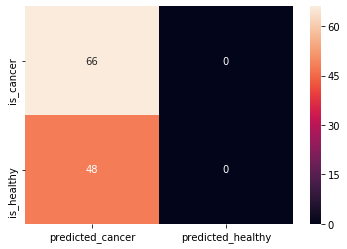

In [23]:
sns.heatmap(confusion, annot=True)

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



**As we can see, our model did not do a very good job in its predictions. It predicted that 48 healthy patients have cancer.**

**Let's explore ways to improve the performance of our model.**

### Improving our Model

The first process we will try is by Normalizing our data

Data Normalization is a feature scaling process that brings all values into range [0,1]

X' = (X-X_min) / (X_max - X_min)-----> X_range

### Normalize Training Data

In [25]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [26]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [27]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [28]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


### Normalize Testing Data

In [29]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [30]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

### SVM with Normalized data

In [32]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,1,47


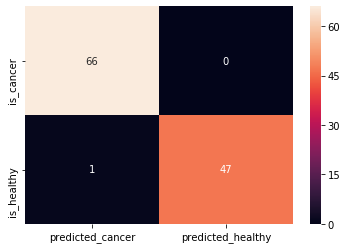

In [33]:
sns.heatmap(confusion,annot=True,fmt="d")

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**Awesome performance! We only have 1 false prediction.**